In [1]:
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.3.1.dev0+gea06a1e.d20250207'

# Nuclei

In [4]:
# Coulomb
nucleus_coulomb = phr.nucleus('Al27_coulomb',Z=13,A=27)

In [5]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_FB = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [6]:
from mpmath import polylog

In [7]:
polylog(2,-np.exp(3.07/0.519))

mpf('-19.137160992678471')

In [8]:
# Fermi (2 parameter)
nucleus_2pF = phr.nucleus('Al27_2pF',Z=13,A=27,c=3.07,z=0.519)
nucleus_2pF.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Al27_2pFfermi2p_x=0.0-1000.0-1.0.txt


In [9]:
# Gauss
nucleus_gauss = phr.nucleus('Al27_gauss',Z=13,A=27,b=2.48)

In [10]:
# Uniform
nucleus_uni = phr.nucleus('Al27_uni',Z=13,A=27,rc=3.92)

In [11]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

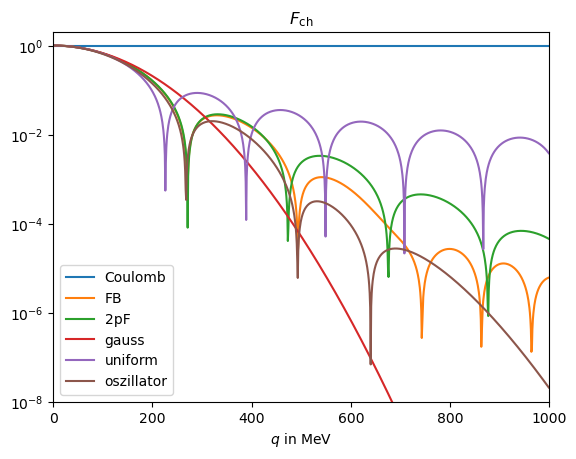

In [12]:
q=np.arange(1,1000,1.)
plt.plot(q,np.abs(nucleus_coulomb.form_factor(q)),label='Coulomb')
plt.plot(q,np.abs(nucleus_FB.form_factor(q)),label='FB')
plt.plot(q,np.abs(nucleus_2pF.form_factor(q)),label='2pF')
plt.plot(q,np.abs(nucleus_gauss.form_factor(q)),label='gauss')
plt.plot(q,np.abs(nucleus_uni.form_factor(q)),label='uniform')
plt.plot(q,np.abs(nucleus_osz.form_factor(q)),label='oszillator')
plt.title(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.ylim(1e-8,2)
plt.xlim(0,1000)
plt.yscale('log')
plt.legend()
plt.show()

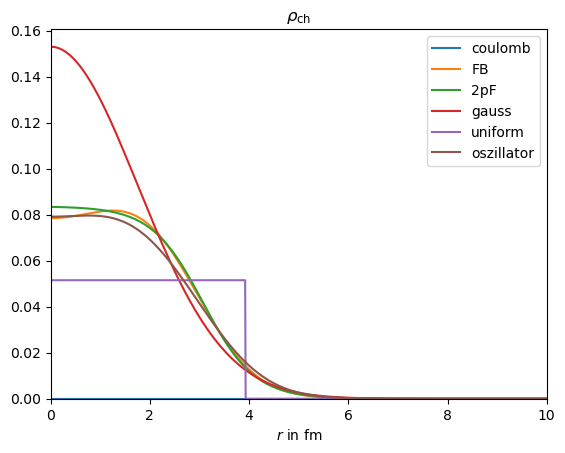

In [13]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_coulomb.charge_density(r),label='coulomb')
plt.plot(r,nucleus_FB.charge_density(r),label='FB')
plt.plot(r,nucleus_2pF.charge_density(r),label='2pF')
plt.plot(r,nucleus_gauss.charge_density(r),label='gauss')
plt.plot(r,nucleus_uni.charge_density(r),label='uniform')
plt.plot(r,nucleus_osz.charge_density(r),label='oszillator')
plt.xlim(0,10)
plt.ylim(0,)
plt.title(r'$\rho_\operatorname{ch}$')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

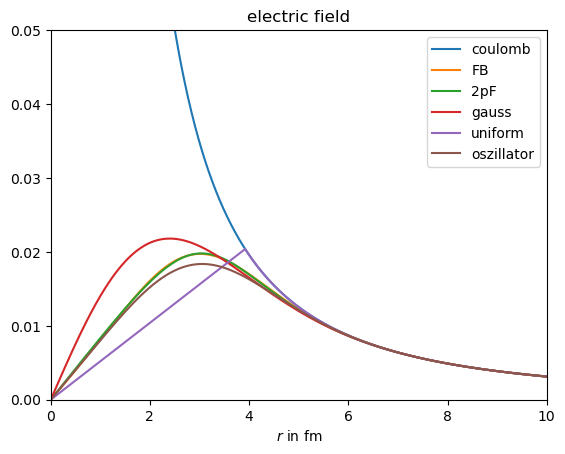

In [14]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_field(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_field(r),label='FB')
plt.plot(r,nucleus_2pF.electric_field(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_field(r),label='gauss')
plt.plot(r,nucleus_uni.electric_field(r),label='uniform')
plt.plot(r,nucleus_osz.electric_field(r),label='oszillator')
plt.xlim(0,10)
plt.ylim(0,0.05)
plt.title(r'electric field')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

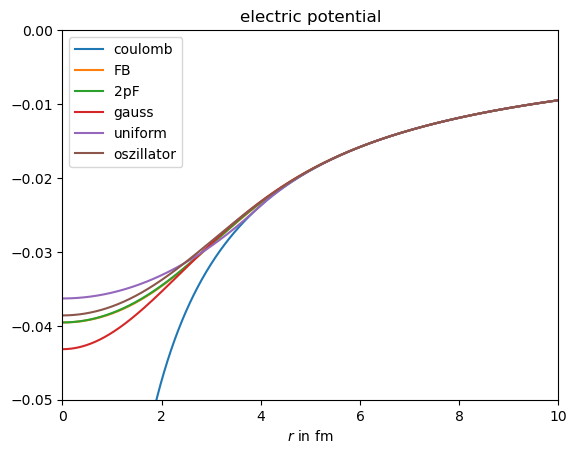

In [15]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_potential(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_potential(r),label='FB')
plt.plot(r,nucleus_2pF.electric_potential(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_potential(r),label='gauss')
plt.plot(r,nucleus_uni.electric_potential(r),label='uniform')
plt.plot(r,nucleus_osz.electric_potential(r),label='oszillator')
plt.ylim(-0.05,0)
plt.xlim(0,10)
plt.title(r'electric potential')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

## References (mainly de Vries et al. 1987)

In [16]:
nuclei={}
previous = ('',0,0)
for (name,A,Z) in phr.nuclei.references.onfile:
    if previous != (name,A,Z):
        nucleus = phr.nuclei.references.load_reference_nucleus(Z=Z,A=A)
        counter = 1
        if type(nucleus)==list:
            for nucleus_i in nucleus:
                nuclei[name+'_ref'+str(counter)] = nucleus_i
                counter+=1
        else:
            nuclei[name+'_ref'+str(counter)] = nucleus
        previous = (name,A,Z)

Warning total charge for 6Li_ref1 deviates more than 1e-3: Z=3, Q=2.9911703492816275
Warning total charge for 10B_ref1 deviates more than 1e-3: Z=5, Q=5.040468192885473
Warning total charge for 64Ni_ref1 deviates more than 1e-3: Z=28, Q=27.93996979272232


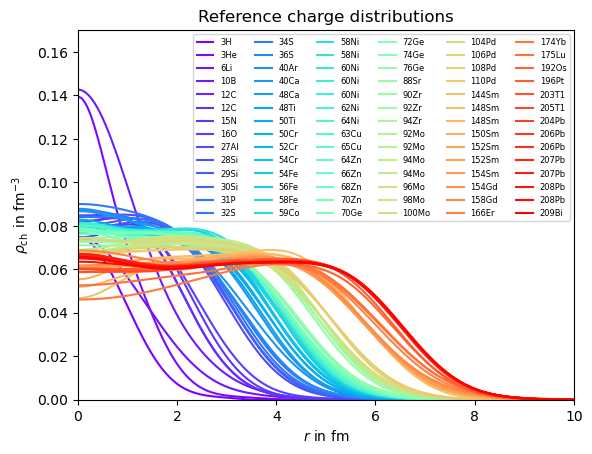

In [17]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,12,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,10)
plt.ylim(0,0.17)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=6)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

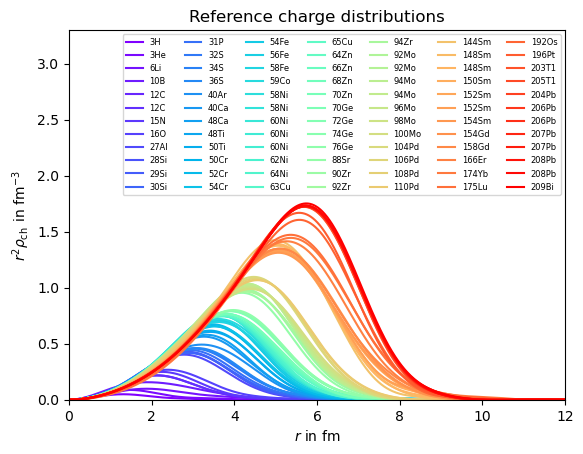

In [19]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,15,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,r**2*nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,12)
plt.ylim(0,3.3)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$r^2\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=7)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

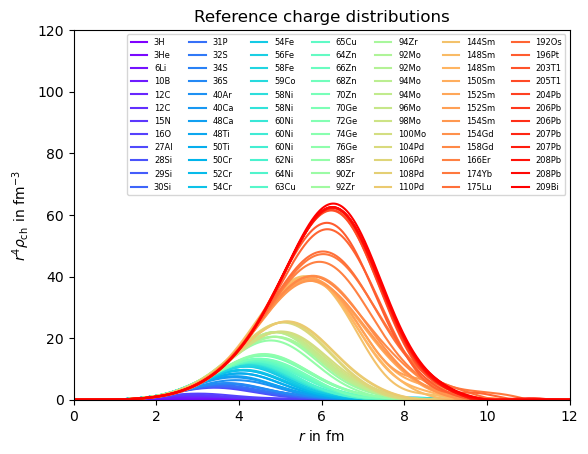

In [20]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,15,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,r**4*nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,12)
plt.ylim(0,120)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$r^4\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=7)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

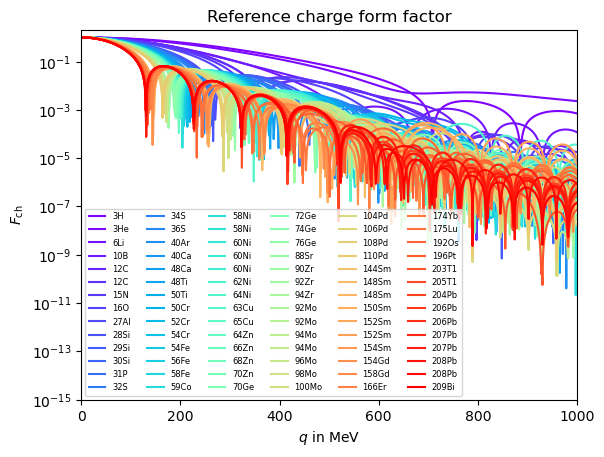

In [21]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

q=np.arange(1,1000,1.)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(q,np.abs(nucleus.form_factor(q)),label=nucleus_name[:-5])
plt.ylim(1e-15,2)
plt.xlim(0,1000)
plt.title(r'Reference charge form factor')
plt.yscale('log')
plt.ylabel(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.legend(loc='lower left',fontsize=6,ncol=6)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

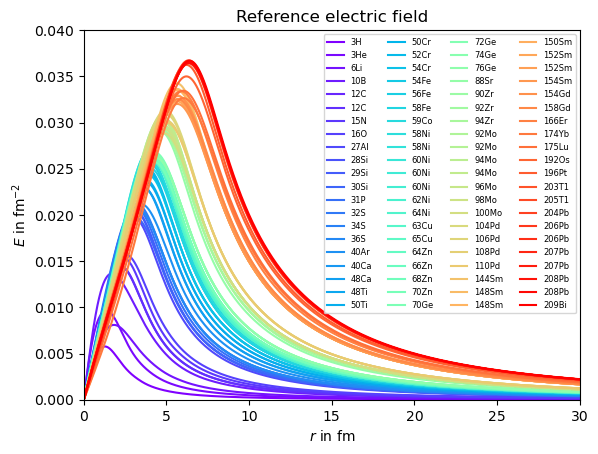

In [22]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,30,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.electric_field(r),label=nucleus_name[:-5])
plt.xlim(0,30)
plt.ylim(0,0.04)
plt.title(r'Reference electric field')
plt.ylabel(r'$E$ in fm$^{-2}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=4)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

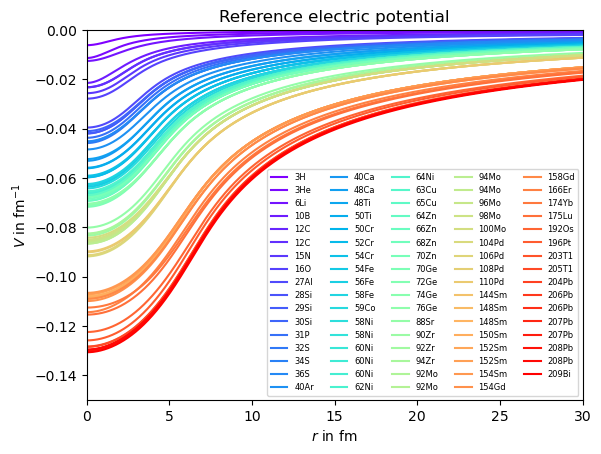

In [23]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,30,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.electric_potential(r),label=nucleus_name[:-5])
plt.ylim(-0.15,0)
plt.xlim(0,30)
plt.title(r'Reference electric potential')
plt.ylabel(r'$V$ in fm$^{-1}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='lower right',fontsize=6,ncol=5)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

# Boundstates

In [8]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [9]:
boundstates_l0_Al27 = phr.boundstates(nucleus_Al27,kappa=-1,lepton_mass=phr.masses.mmu) 
print('E_1s=',boundstates_l0_Al27.energy_levels[0],'MeV') 

E_1s= -0.4650383801521656 MeV


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


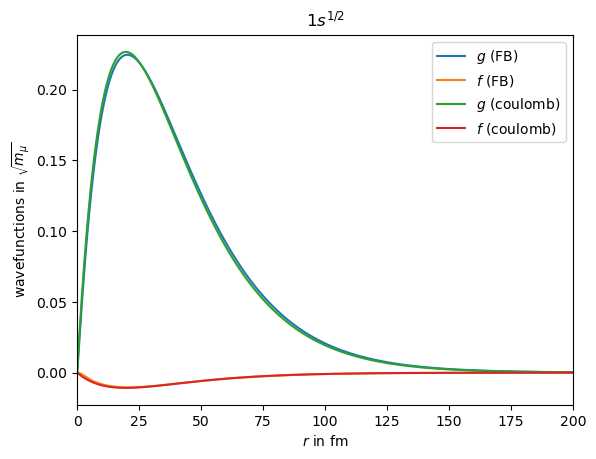

In [10]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_1s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27.wavefunction_f_1s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$1s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [11]:
boundstates_l0_Al27.find_next_solution() 
print('E_2s=',boundstates_l0_Al27.energy_levels[1],'MeV') 

E_2s= -0.11774970562665743 MeV


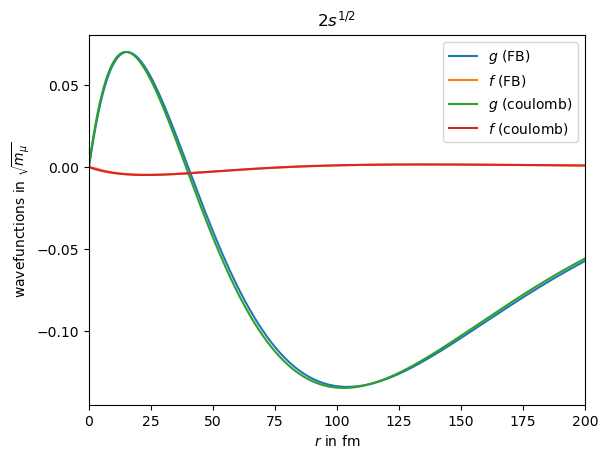

In [12]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_2s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27.wavefunction_f_2s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$2s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [13]:
boundstates_l1_Al27 = phr.boundstates(nucleus_Al27,kappa=+1,lepton_mass=phr.masses.mmu,verbose=True,renew=True) 
print('E_2p12=',boundstates_l1_Al27.energy_levels[0],'MeV') 

r0= 0.0016552069279175009 fm
rc= 496.5620783752503 fm
rinf= 1655.206927917501 fm
dr= 16.552069279175008 fm
dE= 1.1921589806796362e-07 MeV
data not found or forced to recalculate.
This may take some time.
Searching for boundstate in the range of: [ -7.8052272224698065 , 0.0 ]
[ -0.1576813580296914 , -0.0788406790148457 ]-> -0.11826101852226856
[ -0.1194555742649186 , -0.11865920376982331 ]-> -0.11905738901737095
[ -0.11921424987247065 , -0.11920620572604435 ]-> -0.1192102277992575
[ -0.11921148723632768 , -0.11921140598232682 ]-> -0.11921144660932725
data saved in  ./tmp/binding_energies/Al27_FB_2p12_m105.6583745_args0.txt
y0= [-1.00000000e-06 -1.63307386e-03]
E_2p12= -0.11921144660932725 MeV


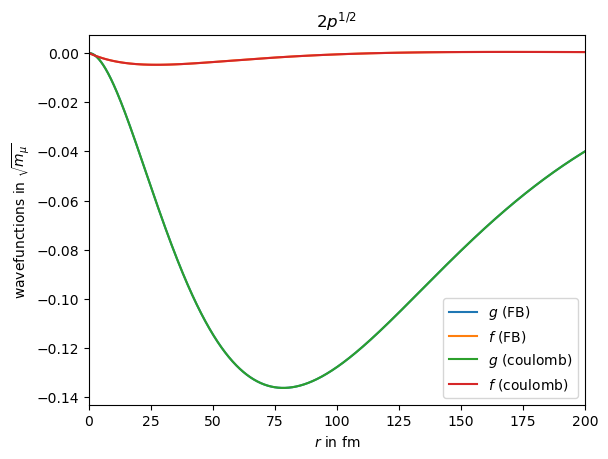

In [14]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l1_Al27.wavefunction_g_2p12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l1_Al27 .wavefunction_f_2p12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,g_c(r),label=r'$g$ (coulomb)')
plt.plot(r,f_c(r),label=r'$f$ (coulomb)')

plt.title(r'$2p^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

# Continuumstates

In [19]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [20]:
continuumstates_l0_Al27 = phr.continuumstates(nucleus_Al27,kappa=-1,energy=250,verbose=True)
continuumstates_l0_Al27.solve_IVP()

r0= 0.0057 fm
rc= 6.6 fm
y0= [ 0.09238163 -0.00022932]
g_c (unnormalized) = 9.602984298537397
f_c (unnormalized) = -8.994435287754722
A/B= -0.3950581069097453
 A = -5.717774655416386
 B = 14.473249771134718
norm 8.774252822325556


(0.0, 50.0)

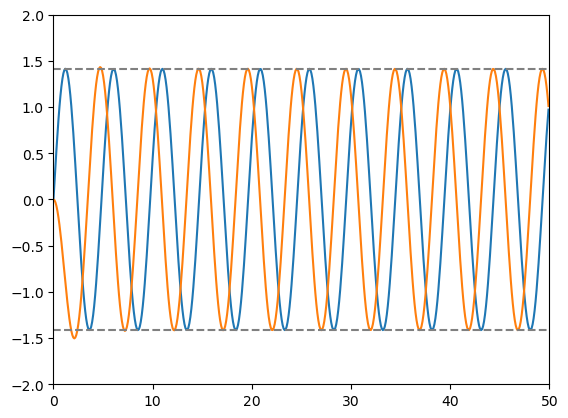

In [21]:
r=np.arange(0,50,0.1)
plt.plot(r,continuumstates_l0_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l0_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

In [22]:
continuumstates_l1_Al27 = phr.continuumstates(nucleus_Al27,kappa=+1,energy=250)
continuumstates_l1_Al27.solve_IVP()

(0.0, 50.0)

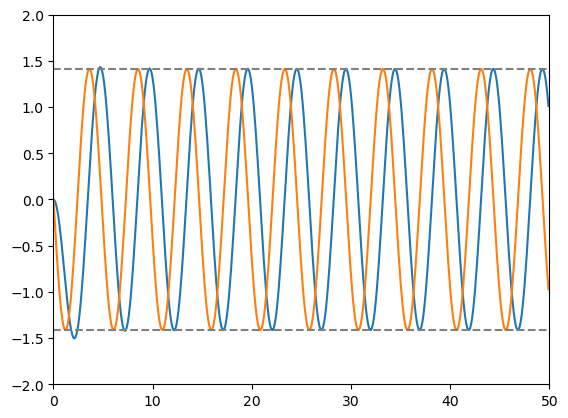

In [23]:
r=np.arange(0,50,0.1)
plt.plot(r,continuumstates_l1_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l1_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

# Crosssection

In [24]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
nucleus_48Ti = phr.nucleus('48Ti_FB',Z=22,A=48,ai=ai_48Ti,R=R_48Ti)

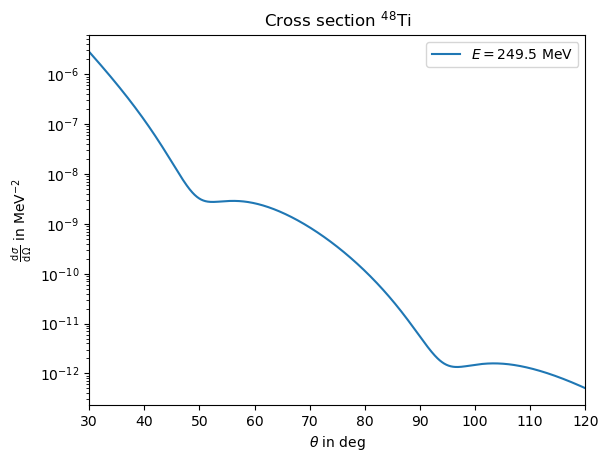

In [25]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

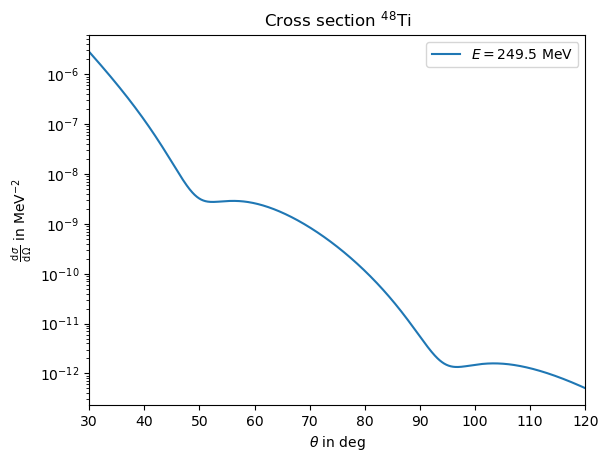

In [27]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_processes=30),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

In [80]:
## assess necessary precision # takes a long time, but enables fastest possible evaluation once these are set
# Uncomment to run again (>5min)
energy=249.5
theta=np.arange(30,120,1e-1)
args=phr.optimise_crosssection_precision(energy,theta*pi/180,nucleus_48Ti,crosssection_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 4.886132717132568 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 4.58647346496582 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 4.455778360366821 diff: 6.176656932874421e-11
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-11}
time: 3.947833776473999 diff: 7.1016741546666155e-09
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-10}
time: 3.918998956680298 diff: 7.210163327771003e-08
new best: {'method': 'DOP853', 'N_partial_waves'

In [81]:
# results of the upper call:
args = {'method': 'DOP853', 'N_partial_waves': 20, 'atol': 1e-06, 'rtol': 1e-07, 'energy_norm': 0.01973269804, 'phase_difference_limit': 1e-06}

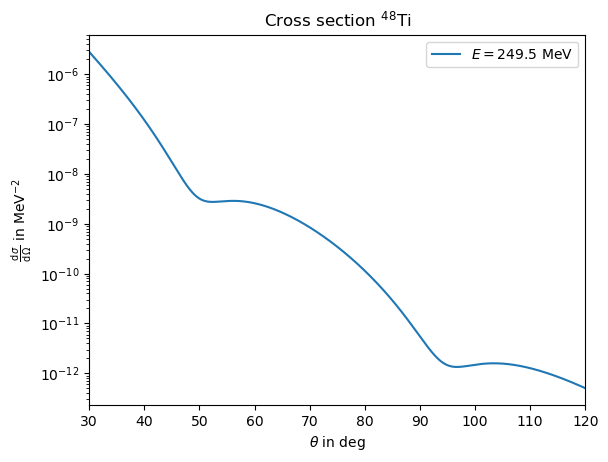

In [82]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,**args),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

In [83]:
args_PVES={
    'N_partial_waves' : 150,
    'atol' : 1e-13,
    'rtol' : 1e-13,
    'phase_difference_limit' : 0,
}

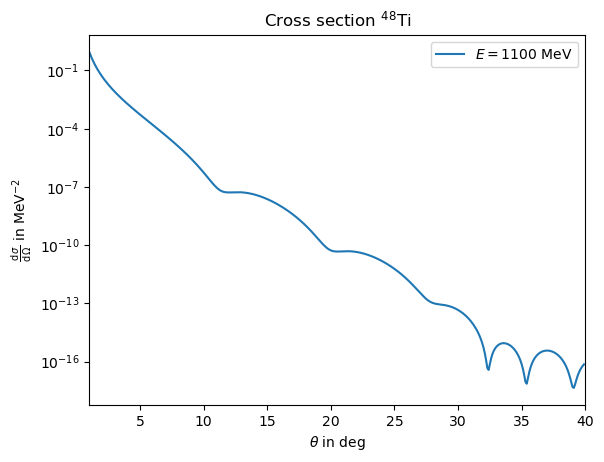

In [84]:
energy=1100
theta=np.arange(1,40,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,**args_PVES),label=r'$E=1100~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

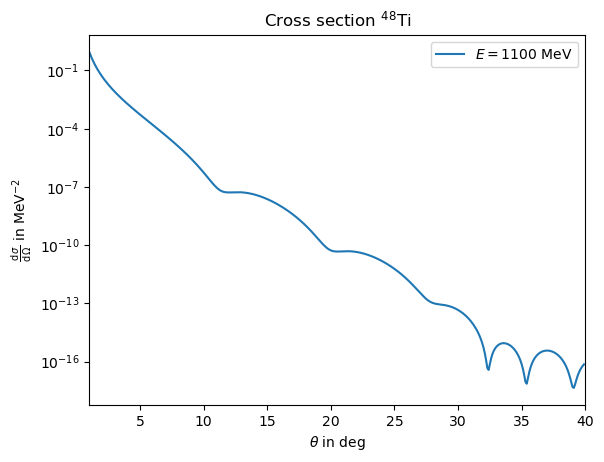

In [85]:
energy=1100
theta=np.arange(1,40,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_processes=30,**args_PVES),label=r'$E=1100~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

In [86]:
## assess necessary precision # takes a long time, but enables fastest possible evaluation once these are set
# Uncomment to run again (>15min)
energy=1100
theta=np.arange(3,10,1e-1)
args_PVES_opt=phr.optimise_crosssection_precision(energy,theta*pi/180,nucleus_48Ti,crosssection_precision=1e-7,N_processes=1)

new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 38.816941022872925 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 36.886953592300415 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 35.068461179733276 diff: 3.61807533535558e-14
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 33.676604986190796 diff: 4.2445505556300895e-13
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 32.269917249679565 diff: 2.3770247528183928e-12
new best: {'method': 'DOP853', 'N_partial_

In [91]:
args_PVES_opt = {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-09, 'rtol': 1e-09, 'energy_norm': 19.732698040000002, 'phase_difference_limit': 1e-10}

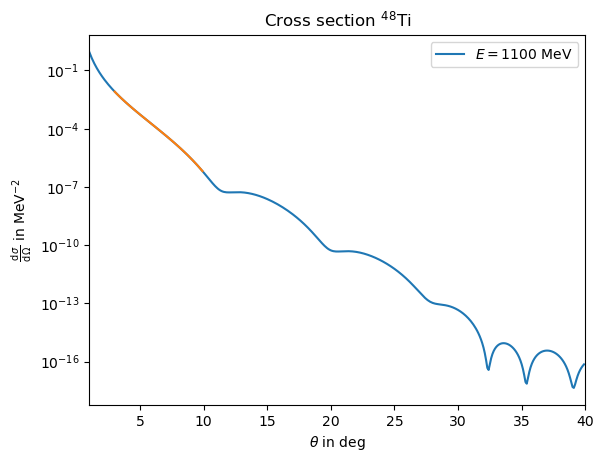

In [92]:
energy=1100
theta=np.arange(1,40,1e-1)
cross=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,**args_PVES_opt)
plt.plot(theta,cross,label=r'$E=1100~$MeV')
plt.plot(theta[np.logical_and(3<=theta,theta<=10)],cross[np.logical_and(3<=theta,theta<=10)])
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

In [29]:
args_PVES_opt_part = {'method': 'DOP853', 'atol': 1e-09, 'rtol': 1e-09, 'energy_norm': 19.732698040000002, 'phase_difference_limit': 1e-10}

In [94]:
N_par_arr = np.arange(20,250,1)
theta=np.arange(3,10,1e-2)
cross_previous = phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=19,**args_PVES_opt_part)
cross_diff_arr=np.array([])

for N_par in N_par_arr:
    print(N_par)
    cross_curr = phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=N_par,**args_PVES_opt_part)
    cross_diff_arr = np.append(cross_diff_arr,np.max(np.abs(cross_curr-cross_previous)))
    cross_previous = cross_curr
    

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


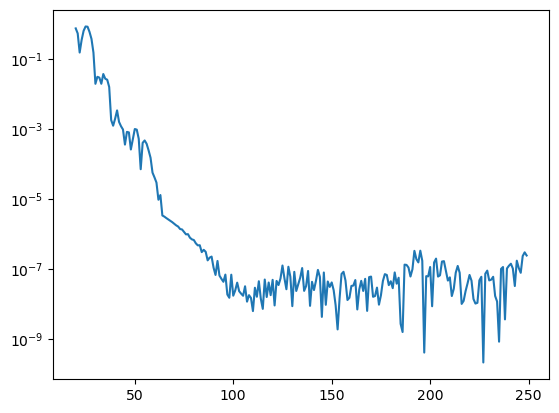

In [95]:
plt.plot(N_par_arr,cross_diff_arr)
plt.yscale('log')

In [ ]:
# for crosssection noise at level <1e-6

In [ ]:
#>100 partialwellen nicht stabil/genau

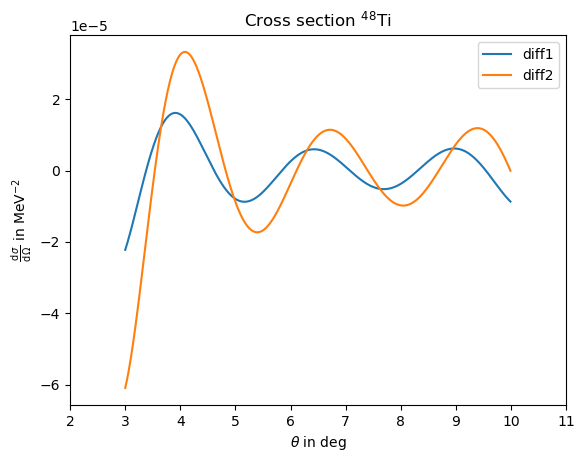

In [30]:
energy=1100
theta=np.arange(3,10,1e-2)
cross=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=150,**args_PVES_opt_part)
cross2=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=140,**args_PVES_opt_part)
cross3=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=130,**args_PVES_opt_part)
plt.plot(theta,(cross-cross2)/cross,label=r'diff1')
plt.plot(theta,(cross-cross3)/cross,label=r'diff2')
#plt.plot(theta[np.logical_and(3<=theta,theta<=10)],cross[np.logical_and(3<=theta,theta<=10)])
#plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(2,11)
plt.show()

## Numerical

In [24]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
N_48Ti=len(ai_48Ti)
qi_48Ti = np.arange(1,N_48Ti+1)*np.pi/R_48Ti
def rho_48Ti(r): return phr.nuclei.parameterizations.fourier_bessel.charge_density_FB(r,ai_48Ti,R_48Ti,qi_48Ti)
nucleus_48Ti_num = phr.nucleus('48Ti_num',Z=22,A=48,charge_density=rho_48Ti)

In [28]:
nucleus_48Ti_num.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_48Ti_num_x=0.0-20.0-0.02.txt


In [29]:
nucleus_48Ti_num.set_electric_field_from_charge_density()
nucleus_48Ti_num.set_electric_potential_from_electric_field()

data loaded from  ./tmp/nucleus_splines/electric_field_48Ti_num_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_48Ti_num_x=0.0-20.0-0.02.txt


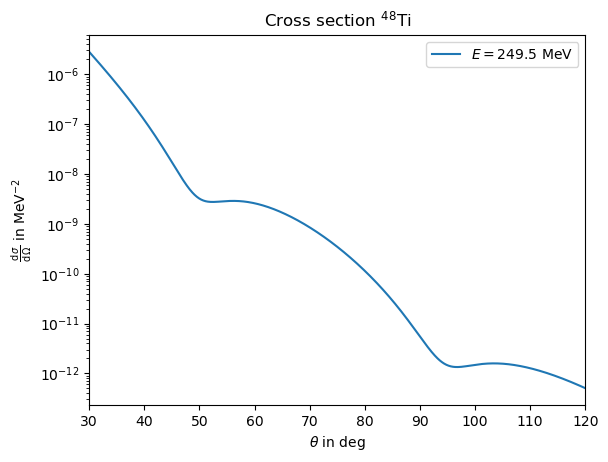

In [30]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti_num),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

# Overlap integrals

In [31]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz_Al27 = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

In [ ]:
phr.overlap_integral_dipole(nucleus_osz_Al27)

In [ ]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'p')

In [ ]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'n')

In [ ]:
phr.overlap_integral_vector(nucleus_osz_Al27,'p')

In [ ]:
phr.overlap_integral_vector(nucleus_osz_Al27,'n')

# PVES

In [ ]:
# Example Nucleus 

In [ ]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
nucleus_48Ti_test0 = phr.nucleus('48Ti_FB',Z=22,A=48,ai=ai_48Ti,R=R_48Ti)
weak_charge_48Ti_test=nucleus_48Ti_test0.Qw
total_charge_48Ti_test=nucleus_48Ti_test0.total_charge
nucleus_48Ti_test = phr.nucleus('48Ti_FB',Z=22,A=48,ai=ai_48Ti,R=R_48Ti,ai_weak=weak_charge_48Ti_test/total_charge_48Ti_test*ai_48Ti,R_weak=R_48Ti)

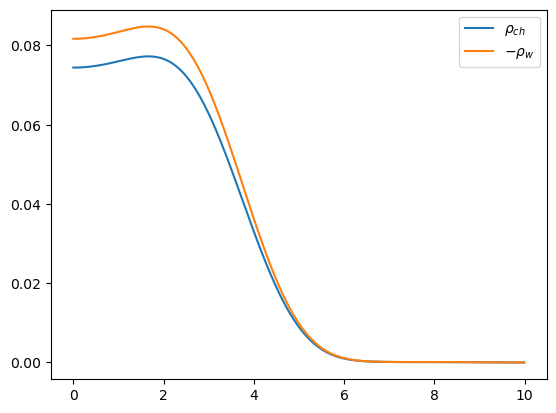

In [6]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_48Ti_test.charge_density(r),label=r'$\rho_{ch}$')
plt.plot(r,-nucleus_48Ti_test.weak_density(r),label=r'$-\rho_{w}$')
plt.xlim(0,10)
plt.ylim(0,)
plt.legend()

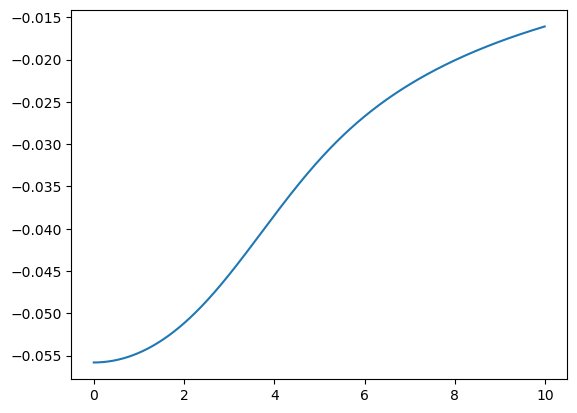

In [7]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_48Ti_test.electric_potential(r))
plt.xlim(0,10)
plt.ylim(None,0)

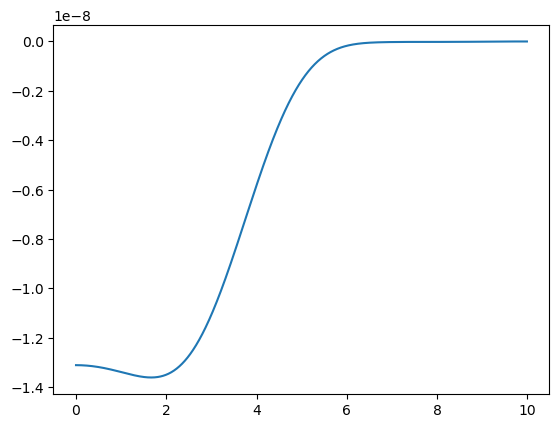

In [8]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_48Ti_test.weak_potential(r))
plt.xlim(0,10)
plt.ylim(None,0)

In [11]:
args_PVES_opt = {'method': 'DOP853', 'atol': 1e-10, 'rtol': 1e-12, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-11}

In [12]:
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=200,parallelise_LR=True,**args_PVES_opt)

In [13]:
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=200,parallelise_LR=False,**args_PVES_opt)

In [14]:
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
#
print('N=200')
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=200,**args_PVES_opt)
print('N=100')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=100,**args_PVES_opt)
print('N=80')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=80,**args_PVES_opt)
#print('N=50')
#A_PV3 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=50,**args_PVES_opt)
#print('N=25')
#A_PV4 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=25,**args_PVES_opt)
#print('N=15')
#A_PV5 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=15,**args_PVES_opt)
#

N=200
N=100
N=80


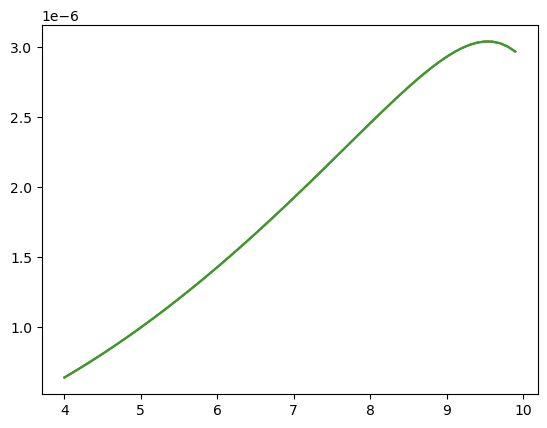

In [15]:
plt.plot(theta_deg,A_PV0)
plt.plot(theta_deg,A_PV1)
plt.plot(theta_deg,A_PV2)
#plt.plot(theta_deg,A_PV3)
#plt.plot(theta_deg,A_PV4)
#plt.plot(theta_deg,A_PV5)

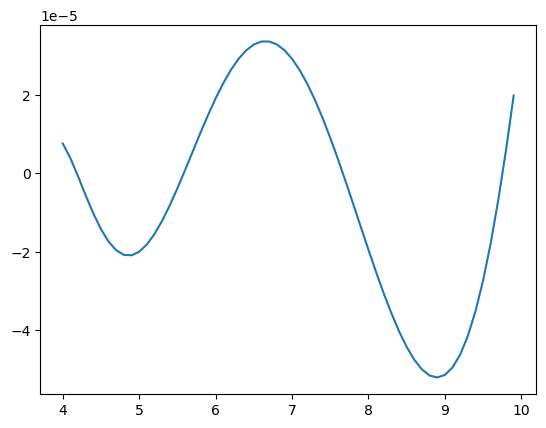

In [16]:
plt.plot(theta_deg,(A_PV2-A_PV1)/(A_PV2+A_PV1))

In [19]:
## assess necessary precision # takes a long time, but enables fastest possible evaluation once these are set
# Uncomment to run again (>1h)
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
args=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 98.35946679115295 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 97.49609851837158 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 88.85743951797485 diff: 3.6102416608719026e-10
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 86.00804710388184 diff: 5.298369030335913e-10
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-11}
time: 79.41482877731323 diff: 1.1774950892892113e-09
new best: {'method': 'DOP853', 'N_partial_wave

In [22]:
args_PVES_direct_opt = args

In [23]:
args_PVES_direct_opt = {'method': 'DOP853', 'N_partial_waves': 60, 'atol': 1e-11, 'rtol': 1e-09, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-06}

In [26]:
args_PVES_direct_opt_part = {'method': 'DOP853', 'atol': 1e-11, 'rtol': 1e-09, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-06}

In [27]:
N_par_arr = np.arange(20,200,1)
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
APV_previous = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,N_partial_waves=19,**args_PVES_direct_opt_part)
APV_diff_arr=np.array([])

for N_par in N_par_arr:
    print(N_par)
    APV_curr = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,N_partial_waves=N_par,**args_PVES_direct_opt_part)
    APV_diff_arr = np.append(APV_diff_arr,np.max(np.abs(APV_curr-APV_previous)))
    APV_previous = APV_curr
    

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


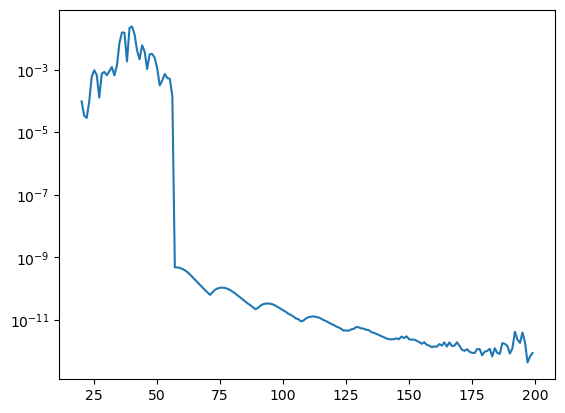

In [28]:
plt.plot(N_par_arr,APV_diff_arr)
plt.yscale('log')

In [21]:
#Pb: 
q_Pb = np.sqrt(0.00616*1e6)
theta_Pb = 4.7*pi/180 #L: 4.71(2) R: 4.67(2)
print(q_Pb)
#Ca: 
q_Ca = np.sqrt(0.0297*1e6)
theta_Ca = 4.51*pi/180
print(q_Ca)
#Al:
q_Al = np.sqrt(0.02357*1e6)
theta_Al = 7.61*pi/180
print(q_Al)

78.48566748139433
172.33687939614086
153.52524222420234


In [22]:
#Pb:
#approx
print(q_Pb/(2*np.sin(theta_Pb/2)))
#approx
#Ca: 
#approx
print(q_Ca/(2*np.sin(theta_Ca/2)))
#Al:
#approx
print(q_Al/(2*np.sin(theta_Al/2)))

957.0550135868299
2189.961300796471
1156.7434233585843


## Old example nucleus

In [23]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz_Al27 = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

In [24]:
# shell model is slow due to hyp1f1 implementation

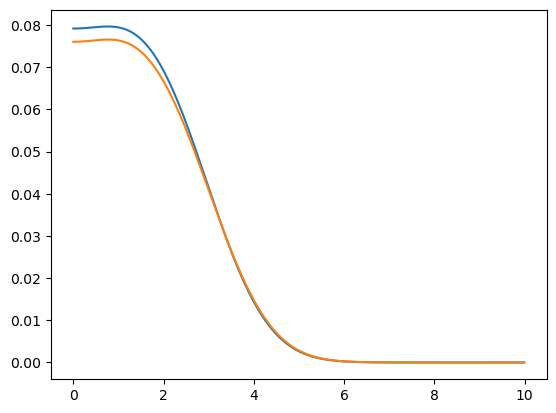

In [25]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_osz_Al27.charge_density(r))
plt.plot(r,-nucleus_osz_Al27.weak_density(r))

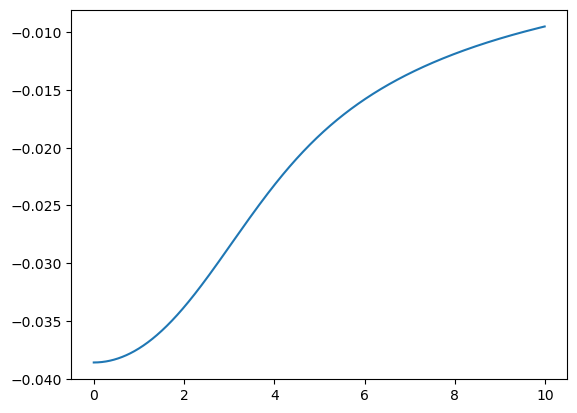

In [26]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_osz_Al27.electric_potential(r))

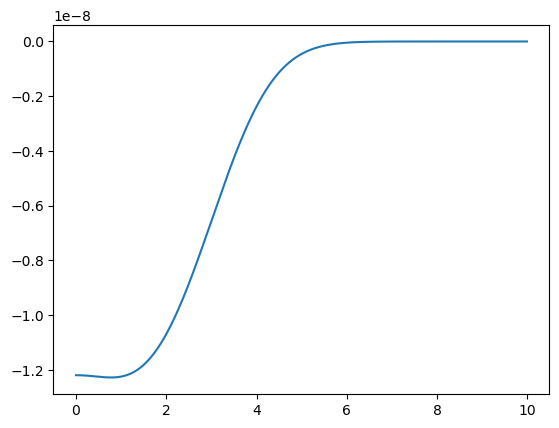

In [27]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_osz_Al27.weak_potential(r))

In [30]:
args_PVES_opt = {'method': 'DOP853', 'atol': 1e-10, 'rtol': 1e-12, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-11}

In [ ]:
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_osz_Al27,verbose=False,N_partial_waves=100,**args_PVES_opt)

In [ ]:
plt.plot(theta_deg,A_PV1)